![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 7

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution


# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import math

# Part 1: Get the data

We are using the `marketing_customer_analysis.csv` file.

In [2]:
df=pd.read_csv("marketing_customer_analysis.csv")

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Part 2: Data Cleaning

#### 1. Checking the headers and the order of columns

In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
#Correct "EmploymentStatus" to "Employment Status" in column
df.columns=['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'Employment Status', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size']

In [6]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
#Move the "Total Claim Amount" column to the end
df=df[['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'Employment Status', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size','Total Claim Amount']]

In [8]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879


#### 2. Checking the type of data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   Employment Status              9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

The "Effective To Date" columns needs to be in a datetime format

In [10]:
df["Effective To Date"]=pd.to_datetime(df["Effective To Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer Lifetime Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   Employment Status              9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status   

#### 3. Checking for missing values

In [11]:
round(df.isnull().sum()/len(df),10)*100

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
Employment Status                0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
Total Claim Amount               0.0
dtype: float64

=> There are no missing values

#### 4. Looking for any typos to correct in the categorical data

In [12]:
df_cat=df.select_dtypes(object)
df_cat

,Customer,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [13]:
for i in df_cat.columns:
    print(("column: ",i),df_cat[i].unique())

('column: ', 'Customer') ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
('column: ', 'State') ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
('column: ', 'Response') ['No' 'Yes']
('column: ', 'Coverage') ['Basic' 'Extended' 'Premium']
('column: ', 'Education') ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
('column: ', 'Employment Status') ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
('column: ', 'Gender') ['F' 'M']
('column: ', 'Location Code') ['Suburban' 'Rural' 'Urban']
('column: ', 'Marital Status') ['Married' 'Single' 'Divorced']
('column: ', 'Policy Type') ['Corporate Auto' 'Personal Auto' 'Special Auto']
('column: ', 'Policy') ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
('column: ', 'Renew Offer Type') ['Offer1' 'Offer3' 'Offer2' 'Offer4']
('column: ', 'Sales Channel') ['Agent' 'Call Center' 'Web' 'Branch']
('column: ', 'Vehicle Cla

=> There are not any typos to correct in the values of categorical data

#### 5. Drop duplicates

In [14]:
df.drop_duplicates()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,198.234764
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,379.200000
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,790.784983
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,691.200000


=> The number of rows and columns remains the same. Thus, there weren´t any duplicates.

#### 6. Drop columns not needed

As the customer identificator is unique to every customer, it won´t be useful in our analysis. Thus, we will drop the column "Customer"

In [15]:
df=df.drop(columns=["Customer"])

In [16]:
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879


#### 7. Changing the date format

In [17]:
effective_dates=[i.strftime(format="%d/%m/%Y") for i in df["Effective To Date"]]
df["Effective To Date"]=effective_dates
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Amount
0,Washington,2763.519279,No,Basic,Bachelor,24/02/2011,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,Arizona,6979.535903,No,Extended,Bachelor,31/01/2011,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,Nevada,12887.431650,No,Premium,Bachelor,19/02/2011,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,California,7645.861827,No,Basic,Bachelor,20/01/2011,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
4,Washington,2813.692575,No,Basic,Bachelor,03/02/2011,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879


# Part 3: Data Processing

## I. Preprocessing Numerical data

In [18]:
#Get the numerical data
df_num=df.select_dtypes("number")
df_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [19]:
df_num.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

#### 1. Santardising numerical data

In [20]:
#Standardisation by column
from sklearn.preprocessing import StandardScaler
# ing standard scaler
transformer = StandardScaler().fit(df_num)
x_standardized = transformer.transform(df_num)
x_standardized

array([[-0.76287773,  0.61282744, -0.70392465, ..., -0.42224956,
        -0.82264788, -0.16963969],
       [-0.14924546, -1.23961684,  0.02269103, ..., -0.42224956,
         2.10615996,  2.400737  ],
       [ 0.71063622,  0.36570978,  0.42959581, ..., -0.42224956,
        -0.40424676,  0.45573376],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ...,  2.87324529,
        -0.40424676,  1.22793667],
       [-0.06993547, -0.51735647,  0.08082028, ..., -0.42224956,
         0.01415436,  0.88511256],
       [-0.78495478, -1.23961684, -0.47140763, ..., -0.42224956,
        -0.82264788, -0.22200449]])

In [21]:
df_num_standardised=pd.DataFrame(x_standardized)
df_num_standardised.head()

,0,1,2,3,4,5,6,7
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843


In [22]:
df_num_standardised.columns=['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount']
df_num_standardised.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843


#### 2. Normalising numerical data

In [23]:
from sklearn.preprocessing import Normalizer

scaler=Normalizer().fit(df_num_standardised)
x_normalised=scaler.transform(df_num_standardised)
x_normalised

array([[-0.27792278,  0.2232582 , -0.25644568, ..., -0.15382907,
        -0.29969755, -0.06180117],
       [-0.04303371, -0.35743341,  0.00654277, ..., -0.12175222,
         0.60729405,  0.69223293],
       [ 0.56430709,  0.29040543,  0.34113651, ..., -0.33530295,
        -0.32100715,  0.36189232],
       ...,
       [ 0.00666606, -0.35718268, -0.06883384, ...,  0.8278957 ,
        -0.11647949,  0.35381716],
       [-0.02575943, -0.19055865,  0.02976865, ..., -0.15552778,
         0.0052135 ,  0.32601478],
       [-0.29710648, -0.4691967 , -0.17842845, ..., -0.15982205,
        -0.31137337, -0.08402901]])

In [24]:
df_num_normalised=pd.DataFrame(x_normalised)
df_num_normalised.head()

,0,1,2,3,4,5,6,7
0,-0.277923,0.223258,-0.256446,0.611346,-0.562232,-0.153829,-0.299698,-0.061801
1,-0.043034,-0.357433,0.006543,-0.060029,-0.062667,-0.121752,0.607294,0.692233
2,0.564307,0.290405,0.341137,0.228860,-0.286412,-0.335303,-0.321007,0.361892
3,-0.022778,-0.540276,0.161900,0.125611,0.264515,-0.184034,0.735595,0.143727
4,-0.438691,0.118089,-0.341202,-0.178516,-0.084572,-0.245161,-0.477634,-0.591547


In [25]:
df_num_normalised.columns=['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount']
df_num_normalised.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.277923,0.223258,-0.256446,0.611346,-0.562232,-0.153829,-0.299698,-0.061801
1,-0.043034,-0.357433,0.006543,-0.060029,-0.062667,-0.121752,0.607294,0.692233
2,0.564307,0.290405,0.341137,0.228860,-0.286412,-0.335303,-0.321007,0.361892
3,-0.022778,-0.540276,0.161900,0.125611,0.264515,-0.184034,0.735595,0.143727
4,-0.438691,0.118089,-0.341202,-0.178516,-0.084572,-0.245161,-0.477634,-0.591547


## II. Preprocessing Categorical Data

In [26]:
#Get the categorical data
df_cat=df.select_dtypes("object")
df_cat.head()

,State,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,24/02/2011,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,31/01/2011,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,19/02/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,20/01/2011,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,03/02/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [27]:
df_cat.columns

Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'Employment Status', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

#### 3. Encoding categorical data

In [28]:
#OneHotEncoder Method
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(df_cat)
encoded = encoder.transform(df_cat).toarray()
encoded_names = list(encoder.get_feature_names())

df_cat_encoded = pd.DataFrame(encoded,columns=encoded_names)

In [29]:
df_cat_encoded.head()

,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Extended,x2_Premium,x3_College,x3_Doctor,x3_High School or Below,...,x12_Branch,x12_Call Center,x12_Web,x13_Luxury Car,x13_Luxury SUV,x13_SUV,x13_Sports Car,x13_Two-Door Car,x14_Medsize,x14_Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### 4. Concat DataFrames

In [30]:
df_processed=pd.concat([df_cat_encoded,df_num_normalised],axis=1)
df_processed.head()

,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Extended,x2_Premium,x3_College,x3_Doctor,x3_High School or Below,...,x14_Medsize,x14_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.277923,0.223258,-0.256446,0.611346,-0.562232,-0.153829,-0.299698,-0.061801
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.043034,-0.357433,0.006543,-0.060029,-0.062667,-0.121752,0.607294,0.692233
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.564307,0.290405,0.341137,0.228860,-0.286412,-0.335303,-0.321007,0.361892
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.022778,-0.540276,0.161900,0.125611,0.264515,-0.184034,0.735595,0.143727
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.438691,0.118089,-0.341202,-0.178516,-0.084572,-0.245161,-0.477634,-0.591547


## III. Normality Check

##### Qualitative tests

###### a) BoxPlot 

Boxplot for variable:  Customer Lifetime Value


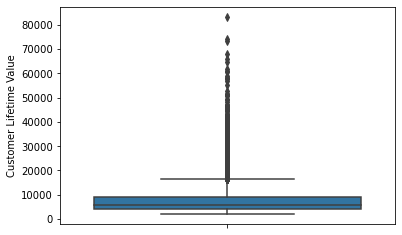

Boxplot for variable:  Income


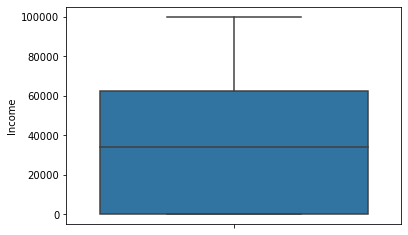

Boxplot for variable:  Monthly Premium Auto


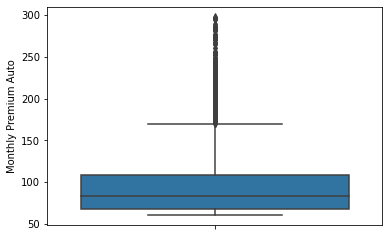

Boxplot for variable:  Months Since Last Claim


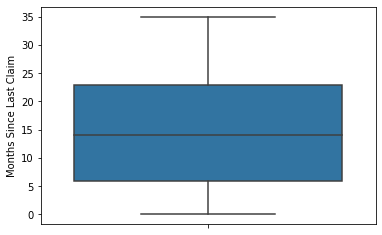

Boxplot for variable:  Months Since Policy Inception


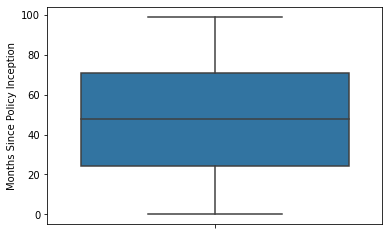

Boxplot for variable:  Number of Open Complaints


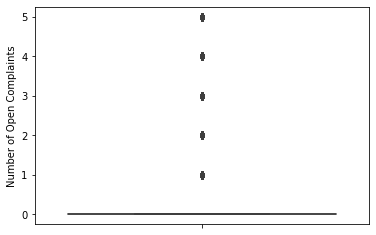

Boxplot for variable:  Number of Policies


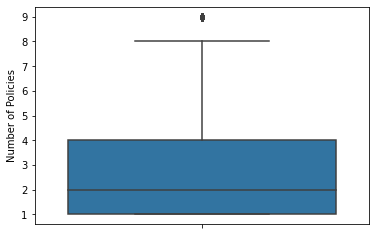

Boxplot for variable:  Total Claim Amount


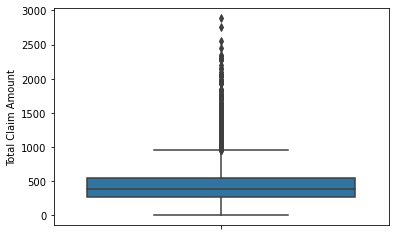

In [31]:
#Before standardisation and normalisation
cols = list(df_num)
for col in cols:
    print("Boxplot for variable: ",col)
    sns.boxplot(y=df_num[col])
    plt.show()

Boxplot for variable:  Customer Lifetime Value


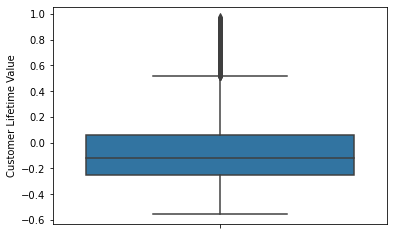

Boxplot for variable:  Income


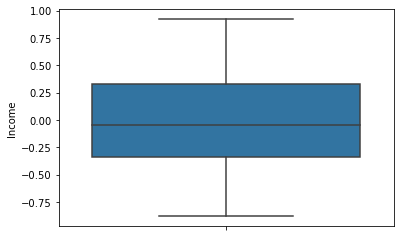

Boxplot for variable:  Monthly Premium Auto


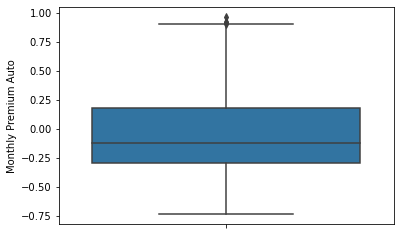

Boxplot for variable:  Months Since Last Claim


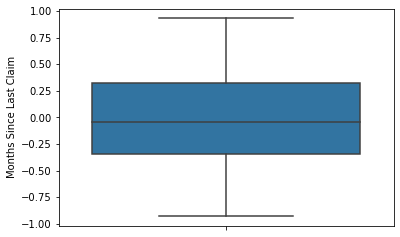

Boxplot for variable:  Months Since Policy Inception


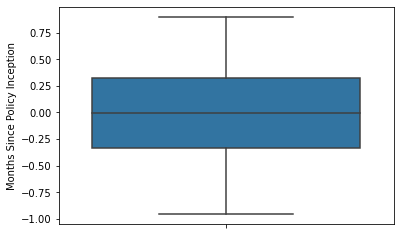

Boxplot for variable:  Number of Open Complaints


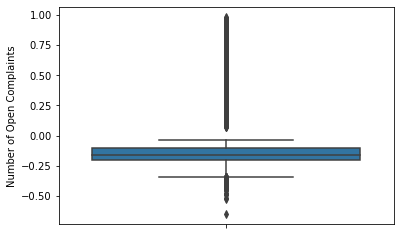

Boxplot for variable:  Number of Policies


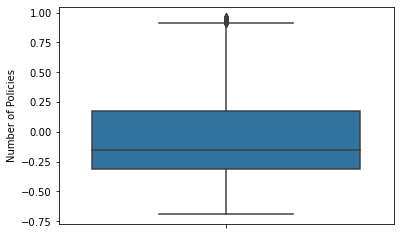

Boxplot for variable:  Total Claim Amount


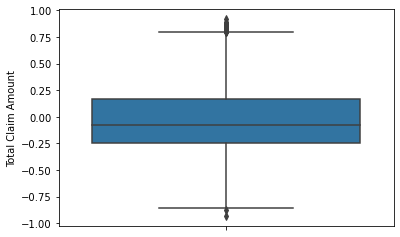

In [32]:
#After standardisation and normalisation
cols = list(df_num_normalised)
for col in cols:
    print("Boxplot for variable: ",col)
    sns.boxplot(y=df_num_normalised[col])
    plt.show()

###### b) Q-Q Plot

Q-Q plot for variable:  Customer Lifetime Value


<ipython-input-33-c554d8a4ccb8>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


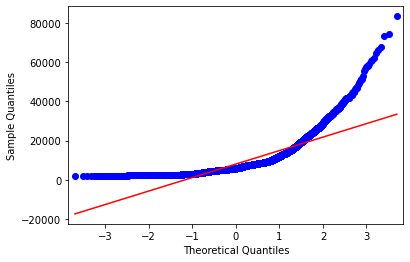

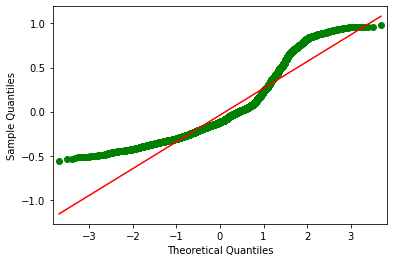

Q-Q plot for variable:  Income


<ipython-input-33-c554d8a4ccb8>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


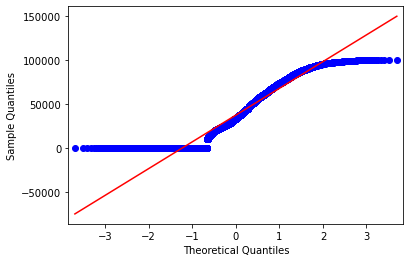

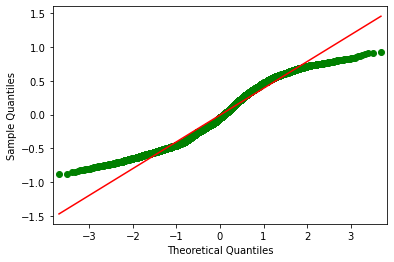

Q-Q plot for variable:  Monthly Premium Auto


<ipython-input-33-c554d8a4ccb8>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


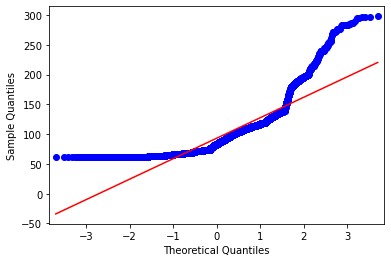

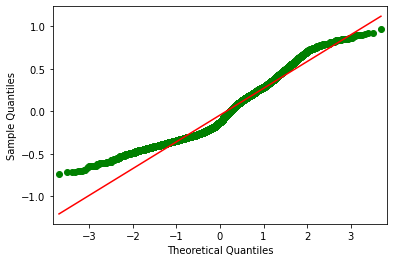

Q-Q plot for variable:  Months Since Last Claim


<ipython-input-33-c554d8a4ccb8>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


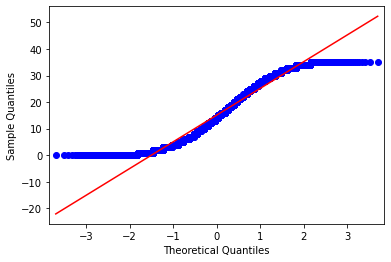

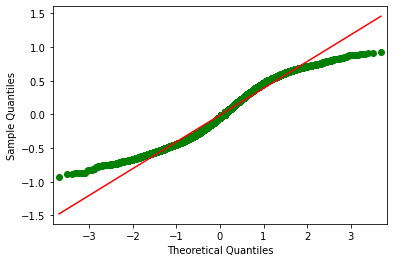

Q-Q plot for variable:  Months Since Policy Inception


<ipython-input-33-c554d8a4ccb8>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


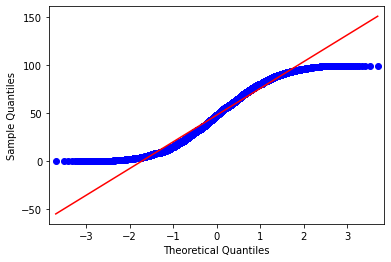

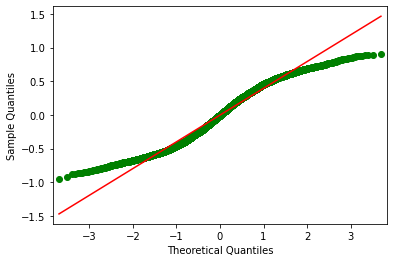

Q-Q plot for variable:  Number of Open Complaints


<ipython-input-33-c554d8a4ccb8>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


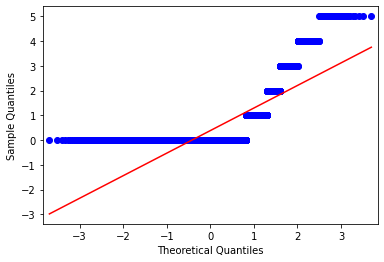

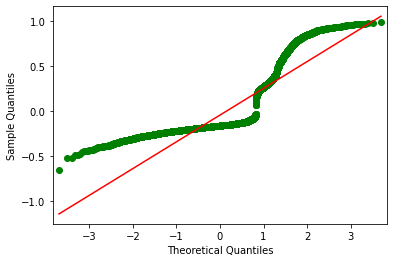

Q-Q plot for variable:  Number of Policies


<ipython-input-33-c554d8a4ccb8>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


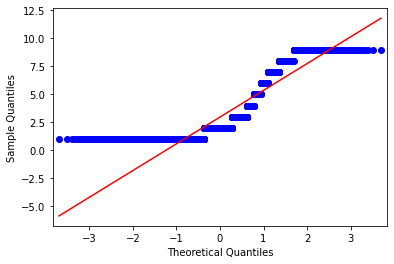

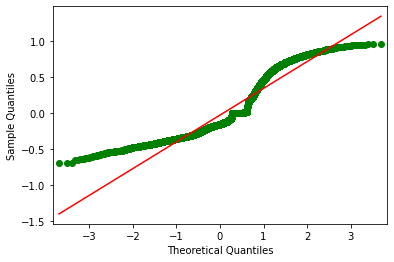

Q-Q plot for variable:  Total Claim Amount


<ipython-input-33-c554d8a4ccb8>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


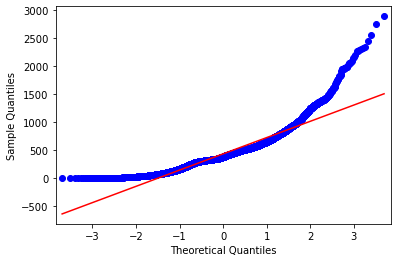

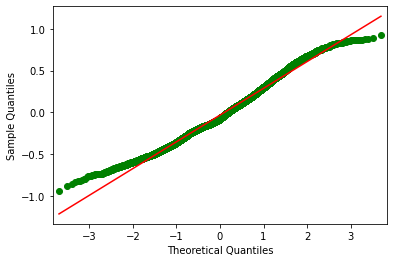

In [33]:
#Before standardisation and normalisation
from statsmodels.graphics.gofplots import qqplot
cols = list(df_num)
for col in cols:
    print("Q-Q plot for variable: ",col)
    #Before
    qqplot(df_num[col], line='s')
    plt.subplot()
    #After
    qqplot(df_num_normalised[col], line="s",color="green")
    plt.show()


###### c) Distplot

Distplot:  Customer Lifetime Value


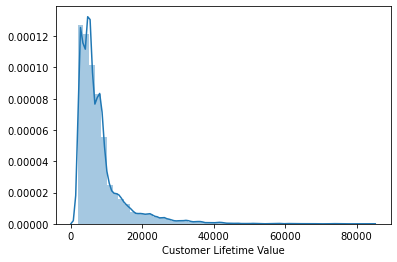

Distplot:  Income


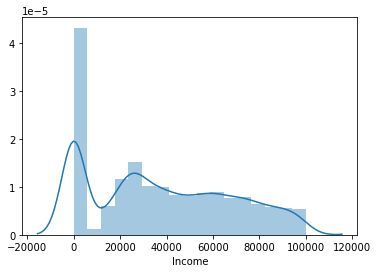

Distplot:  Monthly Premium Auto


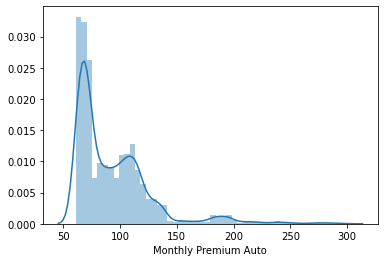

Distplot:  Months Since Last Claim


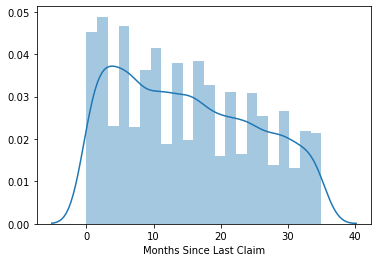

Distplot:  Months Since Policy Inception


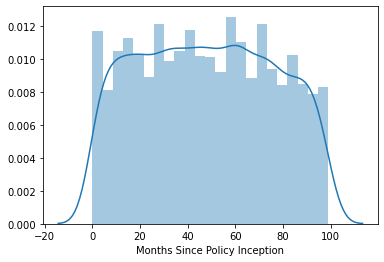

Distplot:  Number of Open Complaints


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


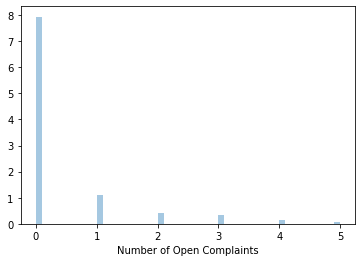

Distplot:  Number of Policies


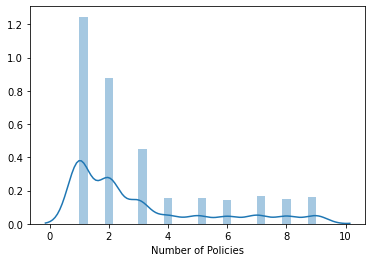

Distplot:  Total Claim Amount


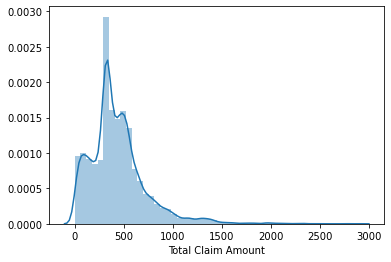

In [34]:
#After standardisation and normalisation
cols = list(df_num)
for col in cols:
    print("Distplot: ",col)
    sns.distplot(df_num[col])
    plt.show()

Distplot:  Customer Lifetime Value


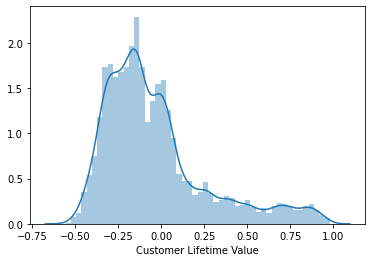

Distplot:  Income


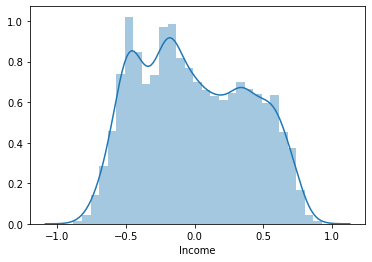

Distplot:  Monthly Premium Auto


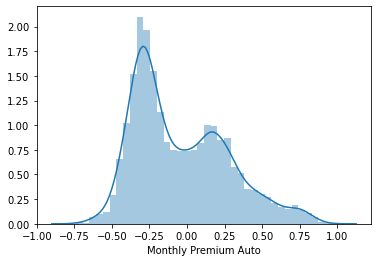

Distplot:  Months Since Last Claim


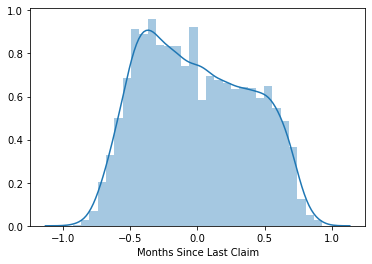

Distplot:  Months Since Policy Inception


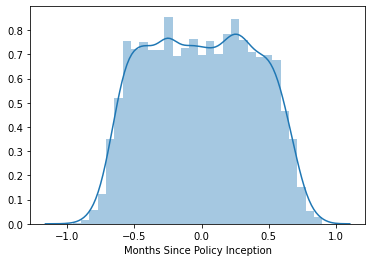

Distplot:  Number of Open Complaints


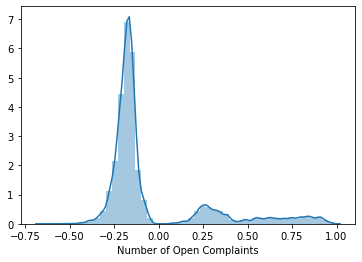

Distplot:  Number of Policies


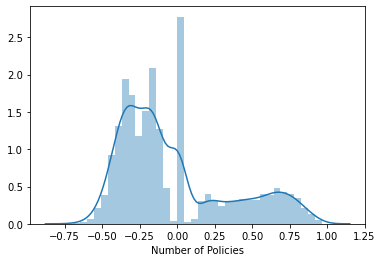

Distplot:  Total Claim Amount


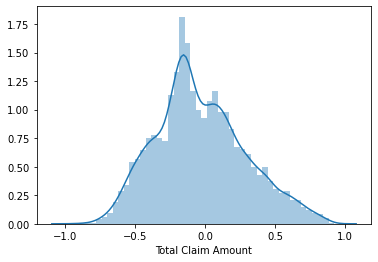

In [35]:
#After standardisation and normalisation
cols = list(df_num_normalised)
for col in cols:
    print("Distplot: ",col)
    sns.distplot(df_num_normalised[col])
    plt.show()


##### Quantitative tests
###### a) Shapiro-Wilk

In [36]:
from scipy.stats import shapiro



cols=list(df_num_normalised)

for col in cols:
    print('\n')
    print("Column: ", col)
    print("Ho: The distribution is normal")
    # normality test
    stat, p = shapiro(df_num_normalised[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    significance_level=0.95
    threshold= 1-significance_level

    if p < threshold:
        print("Reject Ho - Not normal")
    else:
        print('Fail to reject Ho - Normal')



Column:  Customer Lifetime Value
Ho: The distribution is normal
Statistics=0.882, p=0.000
Reject Ho - Not normal


Column:  Income
Ho: The distribution is normal
Statistics=0.967, p=0.000
Reject Ho - Not normal


Column:  Monthly Premium Auto
Ho: The distribution is normal
Statistics=0.947, p=0.000
Reject Ho - Not normal


Column:  Months Since Last Claim
Ho: The distribution is normal
Statistics=0.970, p=0.000
Reject Ho - Not normal


Column:  Months Since Policy Inception
Ho: The distribution is normal
Statistics=0.971, p=0.000
Reject Ho - Not normal


Column:  Number of Open Complaints
Ho: The distribution is normal
Statistics=0.687, p=0.000
Reject Ho - Not normal


Column:  Number of Policies
Ho: The distribution is normal
Statistics=0.882, p=0.000
Reject Ho - Not normal


Column:  Total Claim Amount
Ho: The distribution is normal
Statistics=0.988, p=0.000
Reject Ho - Not normal


/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


###### b) D’Agostino’s K^2 Test

In [37]:
from scipy.stats import normaltest

cols = list(df_num_normalised)

for col in cols:
    print('\n')
    print("Column: ", col)
    # normality test
    stat, p = normaltest(df_num_normalised[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0) - Normal Dist')
    else:
        print("Sample does not look Gaussian (reject H0) - Not Normal Dist")



Column:  Customer Lifetime Value
Statistics=1868.134, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Income
Statistics=2875.051, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Monthly Premium Auto
Statistics=608.332, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Months Since Last Claim
Statistics=2430.933, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Months Since Policy Inception
Statistics=3129.350, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Number of Open Complaints
Statistics=2992.866, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Number of Policies
Statistics=1030.584, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Total Claim Amount
Statistics=205.661, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Although the distribution is still not normal, as we can see from the quantitative tests, it looks more normal than before the normalisation (looking at the qualitative tests we can see that it has improved)

### III. X-Y Split

In [41]:
#x-y split
y=df_processed["Total Claim Amount"]
y.head()

0   -0.061801
1    0.692233
2    0.361892
3    0.143727
4   -0.591547
Name: Total Claim Amount, dtype: float64

In [42]:
x=df_processed.drop("Total Claim Amount",axis=1)
x.head()

,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Extended,x2_Premium,x3_College,x3_Doctor,x3_High School or Below,...,x13_Two-Door Car,x14_Medsize,x14_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,-0.277923,0.223258,-0.256446,0.611346,-0.562232,-0.153829,-0.299698
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.043034,-0.357433,0.006543,-0.060029,-0.062667,-0.121752,0.607294
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.564307,0.290405,0.341137,0.228860,-0.286412,-0.335303,-0.321007
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.022778,-0.540276,0.161900,0.125611,0.264515,-0.184034,0.735595
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.438691,0.118089,-0.341202,-0.178516,-0.084572,-0.245161,-0.477634


### IV. Multicolinearity Check

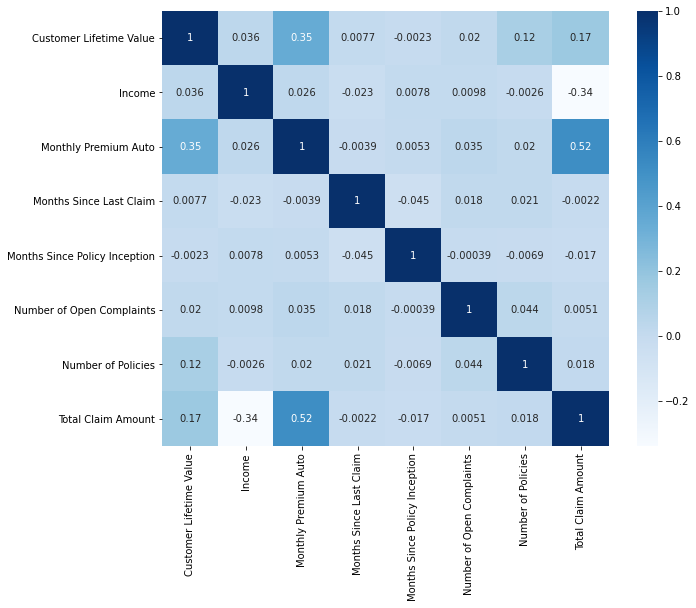

In [38]:
corr_matrix = df_num_normalised.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True,cmap="Blues")
plt.show()

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

X = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:     Total Claim Amount   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              272.8
Date:                Sun, 11 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:52:01   Log-Likelihood:                          3953.7
No. Observations:                9134   AIC:                                     -7695.
Df Residuals:                    9028   BIC:                                     -6941.
Df Model:                         106                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

# Models

In [59]:
##Train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

## 1. Linear Regression Model

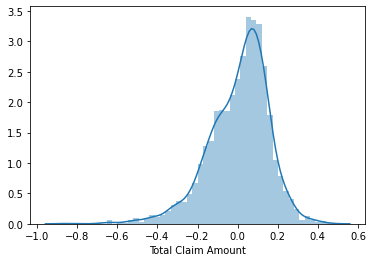

In [60]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
model = regression.fit(x_train,y_train)
y_pred = model.predict(x_test)
residuals = y_pred - y_test
sns.distplot(residuals)

### => Model Performance 

In [61]:
#Regression metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

R2=r2_score(y_test, y_pred)
print("R2 is: ", R2)
MSE=mean_squared_error(y_test, y_pred)
print("MSE is: ", MSE)
RMSE=math.sqrt(MSE)
print("RMSE is: ", RMSE)
MAE=mean_absolute_error(y_test, y_pred)
print("MAE is: ", MAE)

R2 is:  0.7782370713925951
MSE is:  0.022601083515654232
RMSE is:  0.15033656745999702
MAE is:  0.11723726169227029
